In [4]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

In [5]:
def valeur_bruit(n,k=0.33): #Selection de 33 %
    S_bruit=[]
    S_prime=[]
    S_bruit_liss=[]
    for i in range(0,200):
        S_bruit.append((n>((i/200)*n.max())).sum()) # Seuillage du 
    S_bruit=np.array(S_bruit)
    l=len(S_bruit)
    S_bruit_liss=(S_bruit[0:l-5]+S_bruit[1:l-4]+S_bruit[2:l-3]+S_bruit[3:l-2]+S_bruit[4:l-1]+S_bruit[5:l-0])/6 #Lissage du seuil de bruit
    S_bruit_liss=np.concatenate((np.array([S_bruit_liss[0], S_bruit_liss[0], S_bruit_liss[0]]), S_bruit_liss)) 
    seuil=np.argmin(abs(S_bruit_liss-k*max(S_bruit_liss)))
    plt.title("Seuil du bruit ambiant, lissé, et dérivé sa")
    plt.ylabel('Nombre filtrée par le seuil')
    plt.xlabel("Valeur du seuil")
    plt.plot(S_bruit/S_bruit.max())
    plt.plot(S_bruit_liss/S_bruit_liss.max()) 
    plt.plot((k*max(S_bruit_liss))*np.ones(len(S_bruit_liss)))
    plt.show()
    return((seuil/200)*n.max())

def peekadpt(hist,k1=0.33,k2=0.33):
    bruit=valeur_bruit(hist,k1)
    Hist=np.array(hist)
    l=len(Hist)
    Hist_liss=(Hist[0:l-5]+Hist[1:l-4]+Hist[2:l-3]+Hist[3:l-2]+Hist[4:l-1]+Hist[5:l-0])/6
    Hist_liss=np.concatenate((np.array([Hist_liss[0],Hist_liss[0],Hist_liss[0]]),Hist_liss))   
    
    taille=[]
    duree=[]
    for j in range(1,100):
        matflag=(Hist_liss>(((1+(j/10))*bruit)))
        flag=False
        duree.append([])
        num=-1;
        for i in range(len(matflag)):
            if (matflag[i]):
                if not(flag):
                    duree[j-1].append([i,0])
                    flag=True
                    num+=1
            else:
                if (flag):
                    duree[j-1][num][1]=i
                    flag=False
        taille.append(len(duree[j-1]))
    taille=np.array(taille)
    l=len(taille)
    seuil=np.argmin(abs(taille-k2*max(taille)))
    #plt.show()
    plt.plot(Hist_liss)
    plt.plot(bruit*np.ones(len(Hist_liss)))
    plt.plot(seuil/10*bruit*np.ones(len(Hist_liss)))
    plt.show()
    return(duree[seuil-1])

In [6]:
a=np.loadtxt("recherche_seisme.txt")
b=np.loadtxt("recherche_dimanche.txt")
c=np.loadtxt("recherche_merovingiens.txt")

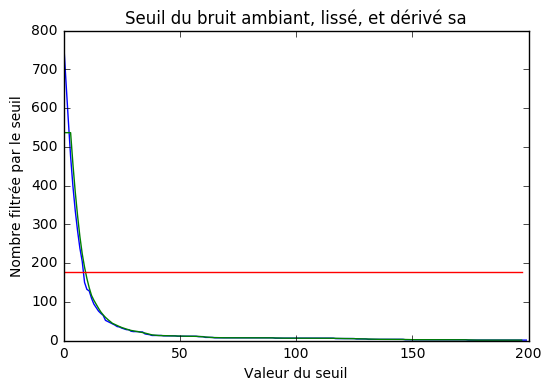

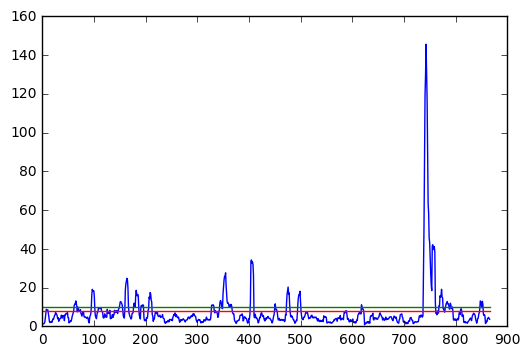

[[97, 101],
 [161, 167],
 [182, 183],
 [351, 357],
 [404, 410],
 [475, 477],
 [499, 500],
 [738, 761],
 [773, 774]]

In [7]:
peekadpt(a)